<a href="https://colab.research.google.com/github/Bksleek/-Network-A-Linking-the-road-network-and-land-use-data/blob/main/Network_A_Linking_the_road_network_and_land_use_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries & Imports

In [ ]:
!pip install snkit osmnx geopandas -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import os
import glob

import geopandas as gpd
import pandas as pd
import networkx as nx
import snkit
import osmnx as ox
import matplotlib.pyplot as plt


import zipfile

In [ ]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

##Download street network from OSMNX

In [ ]:
pip install mapclassify -qq

In [ ]:
from shapely.geometry import Polygon

# Andorra bounding box
north = 42.6560
south = 42.4280
east  = 1.7860
west  = 1.4070

polygon = Polygon([
    (west, south),
    (east, south),
    (east, north),
    (west, north)
])


In [ ]:
m = gpd.GeoDataFrame([polygon], crs=4326, geometry=0).explore()

In [ ]:
bounds.explore(m=m)

In [ ]:
bounds = ox.geocode_to_gdf(query='R9407', by_osmid=True)

In [ ]:
g = ox.graph_from_polygon(bounds.geometry.iloc[0], simplify=True)

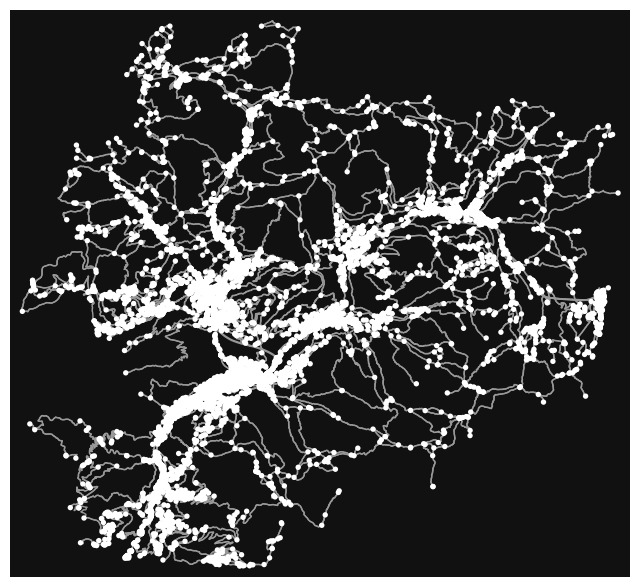

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G_projected = ox.project_graph(g)
ox.plot_graph(G_projected)



In [ ]:
G = ox.graph_from_polygon(polygon, network_type='drive', simplify=True)

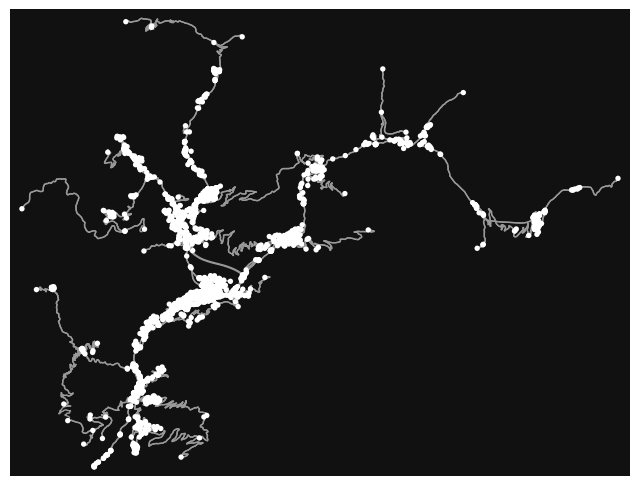

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

##Cleaning the network by consolidating intersections

In [ ]:
# get a GeoSeries of consolidated intersections
ints = ox.consolidate_intersections(G_projected, rebuild_graph=False, tolerance=15, dead_ends=False)
len(ints)

783

In [ ]:
# compare to number of vertices in original graph
len(G)

1978

In [ ]:
G2 = ox.consolidate_intersections(G_projected, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G2)

791

##Transform OSMNX graph to geopanda

In [ ]:
gdf_vertices, gdf_edges = ox.graph_to_gdfs(G2)
gdf_vertices.head()

,osmid_original,x,y,cluster,street_count,highway,geometry
osmid,,,,,,,
0,"[625030, 3699555986, 2794617605, 1929062227, 1...",381327.821282,4.708300e+06,0.0,4,NaN,POINT (381327.821 4708300.496)
1,"[625037, 1922592442, 12087622267, 1922592331, ...",382075.156517,4.709082e+06,1.0,3,NaN,POINT (382075.157 4709081.694)
2,1839958241,381469.014375,4.708481e+06,NaN,3,NaN,POINT (381469.014 4708480.995)
3,625050,382730.451482,4.709609e+06,NaN,3,crossing,POINT (382730.451 4709609.367)
4,1933644535,383061.981106,4.709908e+06,NaN,3,NaN,POINT (383061.981 4709907.83)


In [ ]:
gdf_edges.head()

osmid       highway   lanes  oneway       reversed      length                                           geometry  u_original  v_original maxspeed bridge                          name   ref access tunnel junction width
u v   key                                                                                                                                                                                                                                                                 
0 658 0                                     365957039    trunk_link       1    True          False  169.670888  LINESTRING (381327.821 4708300.496, 381351.286...  3699555986  3699555991      NaN    NaN                           NaN   NaN    NaN    NaN      NaN   NaN
  548 0                                      23925255    trunk_link       2   False           True  145.323251  LINESTRING (381327.821 4708300.496, 381300.321...  2794617605   259406445       70    NaN                           NaN   NaN    NaN    NaN      NaN   NaN
  684 0             [361530089, 274794189, 274794190]  unclassified       2   False  [False, True]  391.389279  LINESTRING (381327.821 4708300.496, 381327.049...  1929062227  2794617767      NaN    yes                           NaN   NaN    NaN    NaN      NaN   NaN
1 2   0    [682650738, 682650739, 361530094, 6179103]         trunk  [3, 4]   False  [False, True]  866.853823  LINESTRING (382075.157 4709081.694, 382050.398...      625037  1839958241       70    yes  Avinguda Coprincep Épiscopal  CG-2    yes    NaN      NaN   NaN
  682 0             [181919650, 181920002, 274794189]  unclassified     NaN   False          False  197.688810  LINESTRING (382075.157 4709081.694, 382074.688...  1922592331  1922600346      NaN    yes                           NaN   NaN    NaN    NaN      NaN   NaN

##Import and clean land use data

### data from geofabric <link>

In [ ]:
zip_path = "/content/andorra-251113-free.shp.zip"
extract_to = "/content/andorra_landuse/"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extracted all files to:", extract_to)

Extracted all files to: /content/andorra_landuse/


In [ ]:
path_to_land = extract_to

os.chdir(path_to_land)
for file in glob.glob("*"):
    print(file)

gis_osm_transport_free_1.shp
gis_osm_natural_free_1.shx
gis_osm_places_free_1.prj
gis_osm_pois_a_free_1.dbf
gis_osm_roads_free_1.shx
gis_osm_pofw_a_free_1.prj
gis_osm_pofw_free_1.cpg
gis_osm_landuse_a_free_1.prj
gis_osm_roads_free_1.dbf
gis_osm_transport_a_free_1.cpg
gis_osm_natural_a_free_1.shx
gis_osm_pois_free_1.dbf
gis_osm_pofw_free_1.prj
gis_osm_roads_free_1.cpg
gis_osm_pois_free_1.prj
gis_osm_roads_free_1.prj
gis_osm_places_free_1.shx
gis_osm_places_a_free_1.dbf
gis_osm_roads_free_1.shp
gis_osm_railways_free_1.dbf
gis_osm_places_free_1.shp
gis_osm_traffic_a_free_1.dbf
gis_osm_water_a_free_1.shx
gis_osm_railways_free_1.shp
gis_osm_traffic_a_free_1.shx
README
gis_osm_transport_free_1.prj
gis_osm_landuse_a_free_1.shx
gis_osm_natural_a_free_1.shp
gis_osm_landuse_a_free_1.cpg
gis_osm_waterways_free_1.prj
gis_osm_natural_a_free_1.prj
gis_osm_railways_free_1.prj
gis_osm_places_a_free_1.prj
gis_osm_pofw_a_free_1.cpg
gis_osm_traffic_free_1.prj
gis_osm_water_a_free_1.dbf
gis_osm_transport_

In [ ]:
glob.glob("/content/andorra_landuse/*.shp")

['/content/andorra_landuse/gis_osm_transport_free_1.shp',
 '/content/andorra_landuse/gis_osm_roads_free_1.shp',
 '/content/andorra_landuse/gis_osm_places_free_1.shp',
 '/content/andorra_landuse/gis_osm_railways_free_1.shp',
 '/content/andorra_landuse/gis_osm_natural_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_transport_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_pofw_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_buildings_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_pois_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_traffic_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_traffic_free_1.shp',
 '/content/andorra_landuse/gis_osm_water_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_places_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_pofw_free_1.shp',
 '/content/andorra_landuse/gis_osm_waterways_free_1.shp',
 '/content/andorra_landuse/gis_osm_natural_free_1.shp',
 '/content/andorra_landuse/gis_osm_landuse_a_free_1.shp',
 '/content/andorra_landuse/gis_osm_p

In [ ]:
landuse = gpd.read_file("/content/andorra_landuse/gis_osm_landuse_a_free_1.shp")
landuse.head()

,osm_id,code,fclass,name,geometry
0,6275507,7202,park,Parc Central,"POLYGON ((1.52457 42.5056, 1.5246 42.50563, 1...."
1,6276661,7201,forest,None,"POLYGON ((1.48948 42.47968, 1.48954 42.48025, ..."
2,6277172,7201,forest,None,"POLYGON ((1.49606 42.46537, 1.49639 42.46554, ..."
3,6277173,7201,forest,None,"POLYGON ((1.4995 42.45965, 1.49956 42.46016, 1..."
4,6279235,7201,forest,None,"POLYGON ((1.53097 42.45011, 1.53125 42.4504, 1..."


In [ ]:
non_residential = landuse[~landuse['fclass'].isin(['residential'])]

In [ ]:
gdf = gdf.to_crs(3857)
...
gdf = gdf.to_crs(4326)

In [ ]:
landuse_centroids = non_residential.copy()
landuse_centroids['geometry'] = landuse_centroids.centroid

/tmp/ipython-input-459922151.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  landuse_centroids['geometry'] = landuse_centroids.centroid


In [ ]:
landuse_centroids = landuse_centroids.to_crs(3857)

In [ ]:
landuse_centroids = landuse_centroids.rename(columns={'fclass':'land use'})

##Concattenating the land use data to the street vertices

In [ ]:
#Geometries to same crs
landuse2 = landuse.to_crs(3857)
landuse2 = landuse2.rename(columns={'fclass':'land use'})

In [ ]:
landuse2['x'] = landuse2.geometry.centroid.x # x coord of centroid
landuse2['y'] = landuse2.geometry.centroid.y # y coord of centroid

In [ ]:
landuse2.head()

,osm_id,code,fclass,name,geometry,x,y
0,6275507,7202,park,Parc Central,"POLYGON ((169714.022 5237018.716, 169717.417 5...",169857.108858,5.237076e+06
1,6276661,7201,forest,None,"POLYGON ((165808.222 5233105.859, 165815.313 5...",167326.650531,5.233799e+06
2,6277172,7201,forest,None,"POLYGON ((166541.194 5230946.406, 166577.651 5...",168467.680333,5.231561e+06
3,6277173,7201,forest,None,"POLYGON ((166923.309 5230083.895, 166930.434 5...",169711.115199,5.230392e+06
4,6279235,7201,forest,None,"POLYGON ((170426.634 5228643.579, 170458.07 52...",171488.749226,5.229019e+06


In [ ]:
gdf_vertices_2 = gdf_vertices.to_crs(3857)

In [ ]:
gdf_vertices_2.head()

,osmid_original,x,y,cluster,street_count,highway,geometry
osmid,,,,,,,
0,"[625030, 3699555986, 2794617605, 1929062227, 1...",381327.821282,4.708300e+06,0.0,4,NaN,POINT (173135.657 5238888.52)
1,"[625037, 1922592442, 12087622267, 1922592331, ...",382075.156517,4.709082e+06,1.0,3,NaN,POINT (174130.196 5239968.067)
2,1839958241,381469.014375,4.708481e+06,NaN,3,NaN,POINT (173322.777 5239137.223)
3,625050,382730.451482,4.709609e+06,NaN,3,crossing,POINT (175006.028 5240700.728)
4,1933644535,383061.981106,4.709908e+06,NaN,3,NaN,POINT (175448.468 5241114.233)


In [ ]:
gdf_vertices_2['x'] = gdf_vertices_2.geometry.x # x coord of column
gdf_vertices_2['y'] = gdf_vertices_2.geometry.y #y coord of column

In [ ]:
#making sure its the same crs as the landuse
gdf_edges_2 = gdf_edges.to_crs(3857)

In [ ]:
gdf_edges_2.head()

osmid       highway   lanes  oneway       reversed      length                                           geometry  u_original  v_original maxspeed bridge                          name   ref access tunnel junction width
u v   key                                                                                                                                                                                                                                                                 
0 658 0                                     365957039    trunk_link       1    True          False  169.670888  LINESTRING (173135.657 5238888.52, 173167.386 ...  3699555986  3699555991      NaN    NaN                           NaN   NaN    NaN    NaN      NaN   NaN
  548 0                                      23925255    trunk_link       2   False           True  145.323251  LINESTRING (173135.657 5238888.52, 173098.736 ...  2794617605   259406445       70    NaN                           NaN   NaN    NaN    NaN      NaN   NaN
  684 0             [361530089, 274794189, 274794190]  unclassified       2   False  [False, True]  391.389279  LINESTRING (173135.657 5238888.52, 173134.369 ...  1929062227  2794617767      NaN    yes                           NaN   NaN    NaN    NaN      NaN   NaN
1 2   0    [682650738, 682650739, 361530094, 6179103]         trunk  [3, 4]   False  [False, True]  866.853823  LINESTRING (174130.196 5239968.067, 174097.127...      625037  1839958241       70    yes  Avinguda Coprincep Épiscopal  CG-2    yes    NaN      NaN   NaN
  682 0             [181919650, 181920002, 274794189]  unclassified     NaN   False          False  197.688810  LINESTRING (174130.196 5239968.067, 174129.098...  1922592331  1922600346      NaN    yes                           NaN   NaN    NaN    NaN      NaN   NaN

In [ ]:
vertices_network = pd.concat([landuse2,gdf_vertices_2])

In [ ]:
vertices_network = vertices_network.reset_index().drop('index', axis=1)

#Snkit to link land use vertices

In [ ]:
#Create basenetwork for snkit
base_network = snkit.Network(vertices_network, gdf_edges_2)

<Axes: >

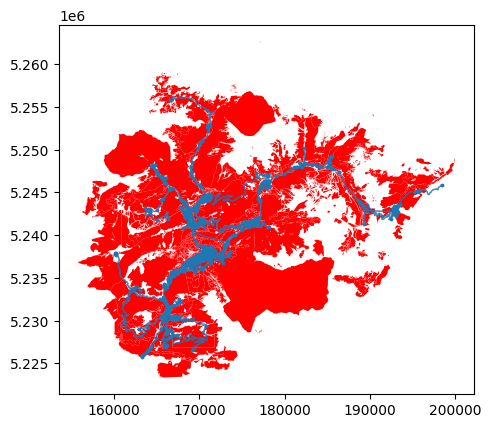

In [ ]:
ax = plt.axes()
base_network.edges.plot(ax=ax, linewidth = 1, alpha = 0.6)
base_network.nodes.plot(ax=ax, facecolor = 'red', markersize = 3)

In [ ]:
base_network.edges = base_network.edges.reset_index()

In [ ]:
from shapely.geometry import Point
base_network.nodes = base_network.nodes[base_network.nodes.geometry.notnull()]
base_network.nodes['geometry'] = base_network.nodes['geometry'].apply(lambda g: g if isinstance(g, Point) else g.centroid if g else None)
base_network.nodes = base_network.nodes[base_network.nodes['geometry'].notnull()]

In [ ]:
print(base_network.nodes.geometry.geom_type.value_counts())

Point    3948
Name: count, dtype: int64


In [ ]:
linked = snkit.network.link_nodes_to_nearest_edge(base_network, condition=None)

<Axes: >

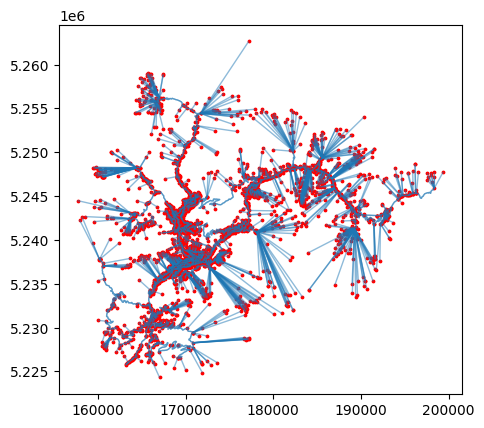

In [ ]:
#plot
ax = plt.axes()
linked.edges.plot(ax=ax, linewidth = 1, alpha = 0.5)
linked.nodes.plot(ax=ax, facecolor = 'red', markersize = 3, alpha = 1)

In [ ]:
# create IDs for the new vertices and edges
with_id = snkit.network.add_topology(snkit.network.add_ids(linked))

In [ ]:
with_id.nodes

,osm_id,code,fclass,name,geometry,x,y,osmid_original,cluster,street_count,highway,id
0,6275507,7202.0,park,Parc Central,POINT (169857.109 5237076.039),169857.108858,5.237076e+06,NaN,NaN,NaN,NaN,node_0
1,6276661,7201.0,forest,None,POINT (167326.651 5233799.423),167326.650531,5.233799e+06,NaN,NaN,NaN,NaN,node_1
2,6277172,7201.0,forest,None,POINT (168467.68 5231560.965),168467.680333,5.231561e+06,NaN,NaN,NaN,NaN,node_2
3,6277173,7201.0,forest,None,POINT (169711.115 5230392.055),169711.115199,5.230392e+06,NaN,NaN,NaN,NaN,node_3
4,6279235,7201.0,forest,None,POINT (171488.749 5229019.336),171488.749226,5.229019e+06,NaN,NaN,NaN,NaN,node_4
...,...,...,...,...,...,...,...,...,...,...,...,...
6178,NaN,NaN,NaN,NaN,POINT (173147.554 5238890.031),NaN,NaN,NaN,NaN,NaN,NaN,node_6178
6179,NaN,NaN,NaN,NaN,POINT (162811.98 5228934.018),NaN,NaN,NaN,NaN,NaN,NaN,node_6179
6180,NaN,NaN,NaN,NaN,POINT (170786.144 5244198.904),NaN,NaN,NaN,NaN,NaN,NaN,node_6180
6181,NaN,NaN,NaN,NaN,POINT (170784.693 5244198.819),NaN,NaN,NaN,NaN,NaN,NaN,node_6181


In [ ]:
landuse_centroids = landuse_centroids.rename(columns={'fclass':'land use'})

In [ ]:
landuse_centroids.columns

Index(['osm_id', 'code', 'land use', 'name', 'geometry'], dtype='object')

In [ ]:
landuse_centroids = landuse_centroids.reset_index(drop=True)
landuse_centroids['node_id'] = 'landuse_' + landuse_centroids.index.astype(str)

In [ ]:
landuse_centroids['x'] = landuse_centroids.geometry.x
landuse_centroids['y'] = landuse_centroids.geometry.y

landuse_nodes = landuse_centroids[['node_id', 'geometry', 'x', 'y', 'land use']].copy()

In [ ]:
landuse_nodes.head()

,node_id,geometry,x,y,land use
0,landuse_0,POINT (169857.109 5237076.038),169857.108677,5.237076e+06,park
1,landuse_1,POINT (167326.614 5233799.288),167326.614230,5.233799e+06,forest
2,landuse_2,POINT (168467.647 5231560.938),168467.647113,5.231561e+06,forest
3,landuse_3,POINT (169711.107 5230392.02),169711.106569,5.230392e+06,forest
4,landuse_4,POINT (171488.746 5229019.317),171488.745978,5.229019e+06,forest


In [ ]:
combined_nodes = pd.concat([gdf_vertices_2, landuse_nodes], ignore_index=True)

In [ ]:
from snkit.network import Network

base_network = Network(nodes=combined_nodes, edges=gdf_edges_2)
with_id = snkit.network.add_ids(base_network)

with_id.nodes['land use'] = with_id.nodes['land use'].fillna('None')

In [ ]:
with_id.nodes.osmid_original = with_id.nodes.osmid_original.fillna(0) #NANs become O

In [ ]:
with_id.nodes.loc[with_id.nodes['osmid_original'] != 0, 'osmid_original'] = 'street' #identifies all street vertices

In [ ]:
with_id.nodes.loc[with_id.nodes['osmid_original'] == 0, 'osmid_original'] = 'not_street' #identifies all non-street vertices

In [ ]:
with_id.nodes = with_id.nodes.rename(columns = {'osmid_original':'vertex_type'}) #change column name to what it is

In [ ]:
with_id.nodes['x'] = with_id.nodes['geometry'].x # x coord of column
with_id.nodes['y'] = with_id.nodes['geometry'].y #y coord of column

In [ ]:
relevant_columns = ['id','land use','vertex_type', 'x', 'y', 'geometry']

#reduce vertices to relevant columns only
vertices = with_id.nodes[relevant_columns]

In [ ]:
with_id.edges['length'] = with_id.edges['length'].fillna(0)
with_id.edges.loc[with_id.edges['length'] == 0, 'highway'] = 'land_use_connector'

In [ ]:
with_id.edges = with_id.edges.rename(columns = {'highway':'edge_type'})
with_id.edges['edge_type']=with_id.edges['edge_type'].astype(str)

In [ ]:
with_id.edges

,osmid,edge_type,lanes,oneway,reversed,length,geometry,u_original,v_original,maxspeed,bridge,name,ref,access,tunnel,junction,width,id
0,365957039,trunk_link,1,True,False,169.670888,"LINESTRING (173135.657 5238888.52, 173167.386 ...",3699555986,3699555991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,edge_0
1,23925255,trunk_link,2,False,True,145.323251,"LINESTRING (173135.657 5238888.52, 173098.736 ...",2794617605,259406445,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,edge_1
2,"[361530089, 274794189, 274794190]",unclassified,2,False,"[False, True]",391.389279,"LINESTRING (173135.657 5238888.52, 173134.369 ...",1929062227,2794617767,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,edge_2
3,"[682650738, 682650739, 361530094, 6179103]",trunk,"[3, 4]",False,"[False, True]",866.853823,"LINESTRING (174130.196 5239968.067, 174097.127...",625037,1839958241,70,yes,Avinguda Coprincep Épiscopal,CG-2,yes,NaN,NaN,NaN,edge_3
4,"[181919650, 181920002, 274794189]",unclassified,NaN,False,False,197.688810,"LINESTRING (174130.196 5239968.067, 174129.098...",1922592331,1922600346,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,edge_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,1447513197,residential,2,False,False,146.613252,"LINESTRING (170938.208 5244160.418, 170920.748...",13281182780,13281182784,30,NaN,NaN,NaN,NaN,NaN,NaN,12,edge_1768
1769,1447513197,residential,2,False,True,213.004040,"LINESTRING (170938.208 5244160.418, 170920.748...",13281182780,9719994245,30,NaN,NaN,NaN,NaN,NaN,NaN,12,edge_1769
1770,1447513198,residential,1,True,False,65.484975,"LINESTRING (170938.208 5244160.418, 170955.669...",13281182785,13281182785,20,NaN,NaN,NaN,NaN,NaN,NaN,6,edge_1770
1771,1447513197,residential,2,False,True,146.613252,"LINESTRING (170759.256 5244086.946, 170782.467...",13281182784,13281182780,30,NaN,NaN,NaN,NaN,NaN,NaN,12,edge_1771


In [ ]:
with_id.edges.columns

Index(['osmid', 'edge_type', 'lanes', 'oneway', 'reversed', 'length', 'geometry', 'from_id', 'to_id', 'maxspeed', 'bridge', 'name', 'ref', 'access', 'tunnel', 'junction', 'width', 'id'], dtype='object')

In [ ]:
with_id.edges = with_id.edges.rename(columns={
    'u_original': 'from_id',
    'v_original': 'to_id'
})

In [ ]:
with_id.edges.columns

Index(['osmid', 'edge_type', 'lanes', 'oneway', 'reversed', 'length', 'geometry', 'from_id', 'to_id', 'maxspeed', 'bridge', 'name', 'ref', 'access', 'tunnel', 'junction', 'width', 'id'], dtype='object')

In [ ]:
relevant_columns = ['length','edge_type', 'id', 'from_id', 'to_id', 'geometry']
edges = with_id.edges[relevant_columns]

In [ ]:
edges['vertex_type'] = 'street'

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
edges

,length,edge_type,id,from_id,to_id,geometry,vertex_type
0,169.670888,trunk_link,edge_0,3699555986,3699555991,"LINESTRING (173135.657 5238888.52, 173167.386 ...",street
1,145.323251,trunk_link,edge_1,2794617605,259406445,"LINESTRING (173135.657 5238888.52, 173098.736 ...",street
2,391.389279,unclassified,edge_2,1929062227,2794617767,"LINESTRING (173135.657 5238888.52, 173134.369 ...",street
3,866.853823,trunk,edge_3,625037,1839958241,"LINESTRING (174130.196 5239968.067, 174097.127...",street
4,197.688810,unclassified,edge_4,1922592331,1922600346,"LINESTRING (174130.196 5239968.067, 174129.098...",street
...,...,...,...,...,...,...,...
1768,146.613252,residential,edge_1768,13281182780,13281182784,"LINESTRING (170938.208 5244160.418, 170920.748...",street
1769,213.004040,residential,edge_1769,13281182780,9719994245,"LINESTRING (170938.208 5244160.418, 170920.748...",street
1770,65.484975,residential,edge_1770,13281182785,13281182785,"LINESTRING (170938.208 5244160.418, 170955.669...",street
1771,146.613252,residential,edge_1771,13281182784,13281182780,"LINESTRING (170759.256 5244086.946, 170782.467...",street


In [ ]:
edges.loc[edges['length'] == 0, 'vertex_type'] = 'not_street'

In [ ]:
edges = edges.drop('length', axis=1)

In [ ]:
vertices

,id,land use,vertex_type,x,y,geometry
0,node_0,None,street,173135.656708,5.238889e+06,POINT (173135.657 5238888.52)
1,node_1,None,street,174130.196043,5.239968e+06,POINT (174130.196 5239968.067)
2,node_2,None,street,173322.777373,5.239137e+06,POINT (173322.777 5239137.223)
3,node_3,None,street,175006.028261,5.240701e+06,POINT (175006.028 5240700.728)
4,node_4,None,street,175448.467577,5.241114e+06,POINT (175448.468 5241114.233)
...,...,...,...,...,...,...
3760,node_3760,meadow,not_street,172429.177675,5.226217e+06,POINT (172429.178 5226217.434)
3761,node_3761,meadow,not_street,172915.402233,5.225721e+06,POINT (172915.402 5225721.368)
3762,node_3762,meadow,not_street,173620.618366,5.226000e+06,POINT (173620.618 5226000.41)
3763,node_3763,meadow,not_street,173365.547797,5.230590e+06,POINT (173365.548 5230589.997)


#Saving the files to Shp

In [ ]:
feather

In [ ]:
path_to_save = "/content/andorra_output/"

vertices.to_file(os.path.join(path_to_save, "andorra_vertices.shp"))
edges.to_file(os.path.join(path_to_save, "andorra_edges.shp"))

/tmp/ipython-input-1613402478.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  vertices.to_file(os.path.join(path_to_save, "andorra_vertices.shp"))
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'vertex_type' to 'vertex_typ'
  ogr_write(
/tmp/ipython-input-1613402478.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edges.to_file(os.path.join(path_to_save, "andorra_edges.shp"))
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'vertex_type' to 'vertex_typ'
  ogr_write(


In [ ]:
os.makedirs(path_to_save, exist_ok=True)
os.chdir(path_to_save)
for file in glob.glob("*"):
    print(file)

andorra_vertices.prj
andorra_edges.dbf
andorra_edges.shp
andorra_edges.prj
andorra_vertices.shp
andorra_vertices.dbf
andorra_vertices.cpg
andorra_vertices.shx
andorra_edges.shx
andorra_edges.cpg


In [ ]:
edges.to_file('edges_a.shp')

/tmp/ipython-input-92391640.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edges.to_file('edges_a.shp')
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'vertex_type' to 'vertex_typ'
  ogr_write(


In [ ]:
vertices.to_file('vertices_a.shp')

/tmp/ipython-input-1168044345.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  vertices.to_file('vertices_a.shp')
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'vertex_type' to 'vertex_typ'
  ogr_write(
